<a href="https://colab.research.google.com/github/Kimeteor309/Financial-big-data-analysis/blob/main/%E9%87%91%E8%9E%8D%E5%A4%A7%E6%95%B8%E6%93%9A%E5%88%86%E6%9E%90_week6%E4%BD%9C%E6%A5%AD_%E6%99%82%E9%96%93%E5%BA%8F%E5%88%97%E3%80%81%E9%87%8F%E5%8C%96%E4%BA%A4%E6%98%93%E7%AD%96%E7%95%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 在 Colab 上使用中文字體


In [2]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib

# 改style要在改font之前
# plt.style.use('seaborn')

matplotlib.font_manager.fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
matplotlib.rc('font', family='Taipei Sans TC Beta')

--2024-10-17 15:36:12--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 142.250.98.100, 142.250.98.102, 142.250.98.139, ...
Connecting to drive.google.com (drive.google.com)|142.250.98.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2024-10-17 15:36:12--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.107.132, 2607:f8b0:400c:c32::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.107.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M  48.6MB/s    in 0.4s    

2024-10-17 15:3

# 取得股價資料

In [3]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# 將民國年轉換為西元年
def convert_to_gregorian(date_str):
    year, month, day = date_str.split('/')
    year = str(int(year) + 1911)  # 民國年轉換為西元年
    return f'{year}/{month}/{day}'

# 從台灣證券交易所 API 獲取每日收盤價
def get_twse_data(stock_id, date):
    url = f"https://www.twse.com.tw/exchangeReport/STOCK_DAY?response=json&date={date}&stockNo={stock_id}"
    response = requests.get(url)
    data = response.json()

    # 解析 JSON 並轉換為 DataFrame
    columns = data['fields']
    rows = data['data']
    df = pd.DataFrame(rows, columns=columns)

    # 將日期轉換為西元年
    df['日期'] = df['日期'].apply(convert_to_gregorian)
    df['日期'] = pd.to_datetime(df['日期'], format='%Y/%m/%d')  # 指定西元年格式

    # 只保留你需要的欄位，並重新命名為英文字段
    df = df[['日期', '開盤價', '最高價', '最低價', '收盤價', '成交股數']].copy()
    df.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']

    # 將數值欄位轉為數字類型，並去除逗號
    df['Open'] = pd.to_numeric(df['Open'].str.replace(',', ''))
    df['High'] = pd.to_numeric(df['High'].str.replace(',', ''))
    df['Low'] = pd.to_numeric(df['Low'].str.replace(',', ''))
    df['Close'] = pd.to_numeric(df['Close'].str.replace(',', ''))
    df['Volume'] = pd.to_numeric(df['Volume'].str.replace(',', ''))

    return df

# 獲取一段日期範圍內的股價資料
def get_data_range(stock_id, start_year, end_year, start_month, end_month):
    all_data = pd.DataFrame()  # 用於存放所有年份和月份的數據

    # 迭代年份
    for year in range(start_year, end_year + 1):
        # 迭代月份
        for month in range(start_month, end_month + 1):
            # 日期格式：YYYYMMDD，只需要指定月份的第一天
            date = f"{year}{month:02d}01"
            # 獲取指定月份的數據
            df_month = get_twse_data(stock_id, date)
            # 合併當前月份數據到所有數據中
            all_data = pd.concat([all_data, df_month], ignore_index=True)  # 合併時確保索引正確

    return all_data

# 取得台積電從4月至9月的股價資料
stock_id = '2330'  # 台積電股票代號
df = get_data_range(stock_id, 2020, 2023, 1, 12)

# 顯示資料
df

,Date,Open,High,Low,Close,Volume
0,2020-01-02,332.5,339.0,332.5,339.0,33282120
1,2020-01-03,344.0,345.0,335.5,339.5,42023268
2,2020-01-06,333.0,334.5,332.0,332.0,45677057
3,2020-01-07,332.5,333.0,326.5,329.5,51746181
4,2020-01-08,325.0,333.0,325.0,329.5,37913748
...,...,...,...,...,...,...
969,2023-12-25,582.0,585.0,580.0,581.0,9994163
970,2023-12-26,583.0,586.0,582.0,586.0,17033926
971,2023-12-27,587.0,592.0,586.0,592.0,34750958
972,2023-12-28,592.0,593.0,589.0,593.0,27152352


# 1. 使用Python建立ARIMA模型，預測股票價格，並進行可視化。

In [4]:
pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.5 MB/s eta 0:00:00


**使用 auto_arima**

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6910.704, Time=0.47 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6908.363, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6908.721, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6908.706, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6907.300, Time=0.04 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.834 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  974
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -3452.650
Date:                Thu, 17 Oct 2024   AIC                           6907.300
Time:                        15:37:55   BIC                           6912.181
Sample:                             0   HQIC                          6909.158
                                - 974                                       

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


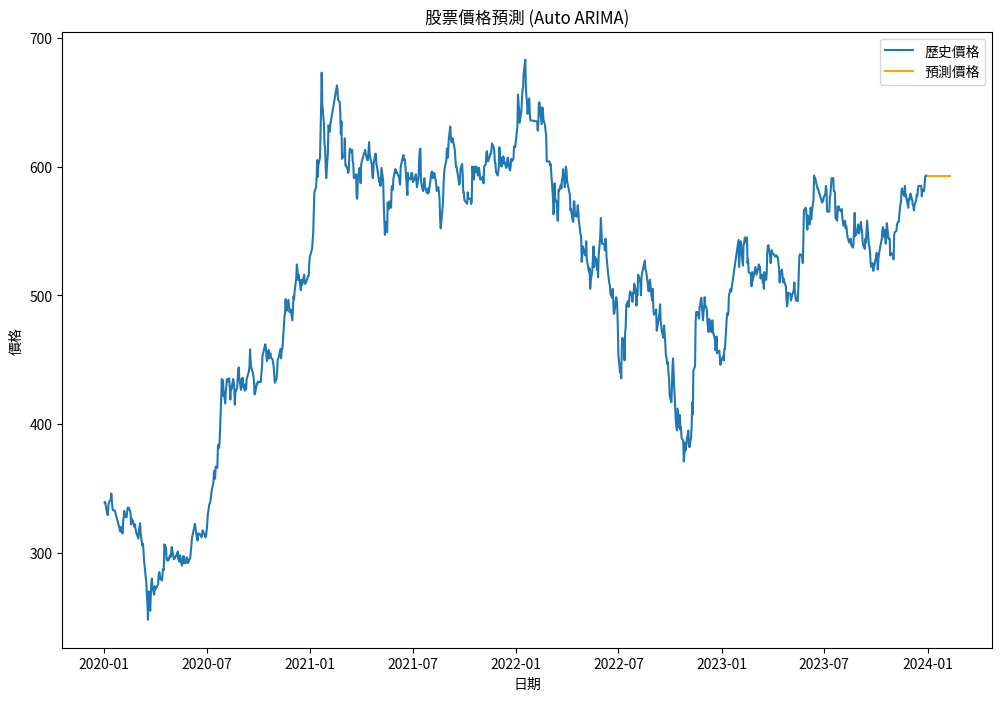

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import pmdarima as pm
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error

# 讀取股票資料
def get_stock_data():
    df = get_data_range(stock_id, 2020, 2023, 1, 12)
    df = df[['Date', 'Close']]  # 假設資料有 'Date' 和 'Close' 兩欄
    df['Date'] = pd.to_datetime(df['Date'])  # 將 'Date' 轉換為 datetime 格式
    df.set_index('Date', inplace=True)  # 將 'Date' 設為索引
    df.dropna(inplace=True)  # 移除缺失值
    return df

# 使用 auto_arima 自動選擇參數
def train_auto_arima_model(df):
    model = pm.auto_arima(df['Close'],
            start_p=1, max_p=5,  # 擴展 p 的範圍
            start_q=1, max_q=5,  # 擴展 q 的範圍
            d=1,                # 使用一次差分
            seasonal=False,      # 暫時不考慮季節性
            stepwise=True,      # 使用逐步法加速模型選擇
            suppress_warnings=True,
            trace=True)       # 查看測試過程中的模型與分數
    return model

# 預測未來價格
def forecast_arima_model(model, steps=30):
    forecast = model.predict(n_periods=steps)  # 使用自動 ARIMA 模型進行預測
    return forecast

# 可視化結果
def plot_forecast(df, forecast, steps=30):
    plt.figure(figsize=(12, 8))
    plt.plot(df['Close'], label='歷史價格')

    # 預測未來日期
    forecast_dates = pd.date_range(df.index[-1], periods=steps+1, freq='B')[1:]  # B表示工作日
    plt.plot(forecast_dates, forecast, label='預測價格', color='orange')

    plt.title('股票價格預測 (Auto ARIMA)')
    plt.xlabel('日期')
    plt.ylabel('價格')
    plt.legend()
    plt.show()

# 主程式
if __name__ == "__main__":
    df = get_stock_data()

    # 使用 auto_arima 進行自動參數選擇並訓練模型
    model = train_auto_arima_model(df)

    # 打印模型摘要
    print(model.summary())

    # 預測未來 30 天的價格
    steps = 30
    forecast = forecast_arima_model(model, steps=steps)

    # 可視化結果
    plot_forecast(df, forecast, steps=steps)

    # 打印均方誤差 (MSE)
    predictions = model.predict_in_sample()
    mse = mean_squared_error(df['Close'], predictions)
    print(f'模型的均方誤差 (MSE): {mse:.4f}')


**自定義ARIMA**

**(p,d,q) --> 模型的均方誤差 (MSE)**

(5,1,0) --> 188.3425

(5,1,1) --> 188.2262

**(5,1,2) --> 188.1115**

(5,2,2) --> 217.9963

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  974
Model:                 ARIMA(5, 2, 2)   Log Likelihood               -3450.804
Date:                Thu, 17 Oct 2024   AIC                           6917.608
Time:                        15:41:13   BIC                           6956.643
Sample:                             0   HQIC                          6932.465
                                - 974                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9236      0.218     -4.240      0.000      -1.351      -0.497
ar.L2          0.0352      0.038      0.927      0.354      -0.039       0.110
ar.L3         -0.0422      0.037     -1.142      0.2

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


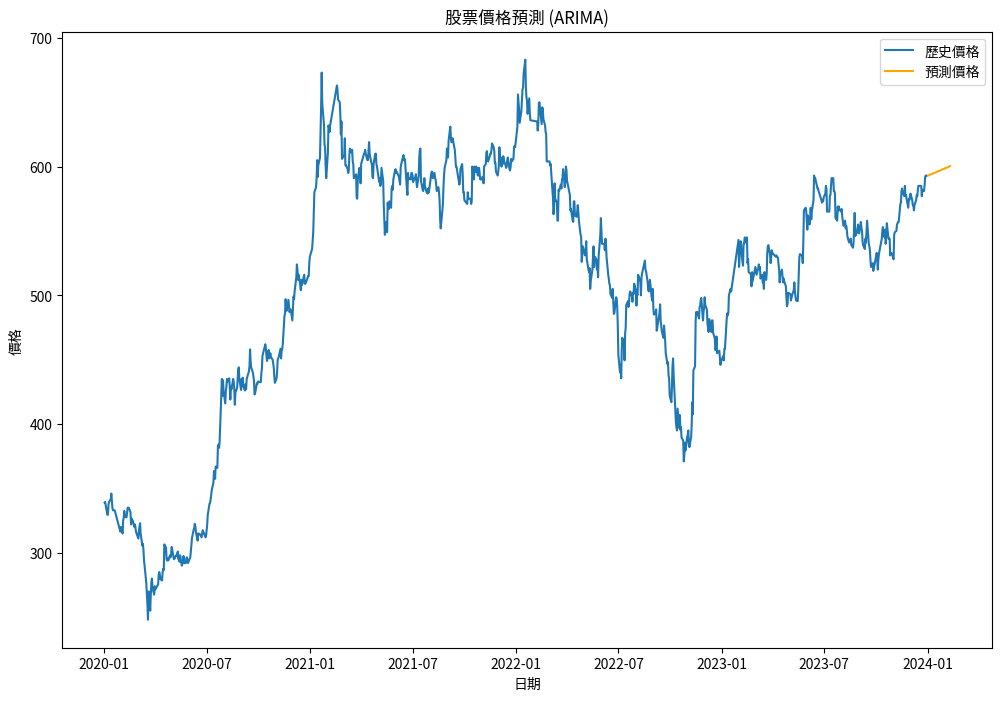

模型的均方誤差 (MSE): 217.9963


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# 讀取股票資料
def get_stock_data():
    # 使用假設函數獲取數據，根據你的實際情況改寫
    df = get_data_range(stock_id, 2020, 2023, 1, 12)
    df = df[['Date', 'Close']]  # 假設資料有 'Date' 和 'Close' 兩欄
    df['Date'] = pd.to_datetime(df['Date'])  # 將 'Date' 轉換為 datetime 格式
    df.set_index('Date', inplace=True)  # 將 'Date' 設為索引
    df.dropna(inplace=True)  # 移除缺失值
    return df

# 訓練 ARIMA 模型
def train_arima_model(df, order=(5, 2, 2)):
    model = ARIMA(df['Close'], order=order)
    model_fit = model.fit()
    return model_fit

# 預測未來價格
def forecast_arima_model(model_fit, steps=30):
    # ARIMA 模型的預測需要指定開始和結束點
    start = len(df)
    end = start + steps - 1
    forecast = model_fit.predict(start=start, end=end)  # 預測未來 steps 天
    return forecast

# 可視化結果
def plot_forecast(df, forecast, steps=30):
    plt.figure(figsize=(12, 8))
    plt.plot(df['Close'], label='歷史價格')

    # 預測未來日期
    forecast_dates = pd.date_range(df.index[-1], periods=steps+1, freq='B')[1:]  # B表示工作日
    plt.plot(forecast_dates, forecast, label='預測價格', color='orange')

    plt.title('股票價格預測 (ARIMA)')
    plt.xlabel('日期')
    plt.ylabel('價格')
    plt.legend()
    plt.show()

# 主程式
if __name__ == "__main__":
    df = get_stock_data()

    # 訓練 ARIMA 模型
    arima_order = (5, 2, 2)  # AR(5), I(1), MA(0) 模型
    model_fit = train_arima_model(df, order=arima_order)

    # 打印模型摘要
    print(model_fit.summary())

    # 預測未來 30 天的價格
    steps = 30
    forecast = forecast_arima_model(model_fit, steps=steps)

    # 可視化結果
    plot_forecast(df, forecast, steps=steps)

    # 打印均方誤差 (MSE)
    predictions = model_fit.predict(start=0, end=len(df)-1)  # 樣本內預測
    mse = mean_squared_error(df['Close'], predictions)
    print(f'模型的均方誤差 (MSE): {mse:.4f}')


# 2. 使用Python設計一個量化交易策略，並使用歷史資料進行回測 --> 均值回歸策略




最終投資組合價值: $4544.71


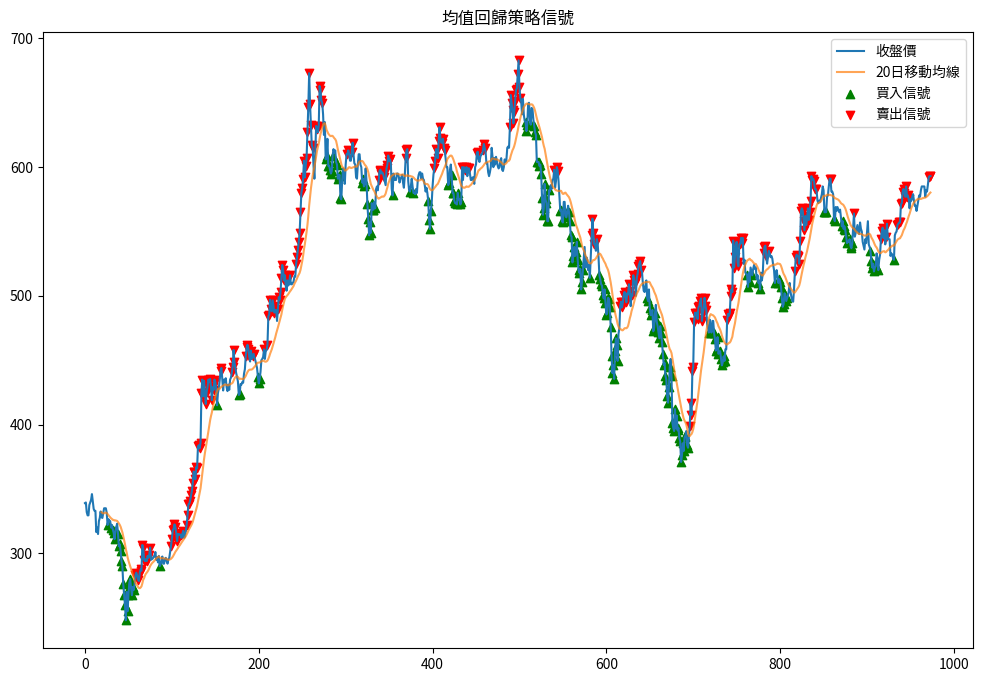

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 讀取你的資料集
def get_data_from_csv():
    df = get_data_range(stock_id, 2020, 2023, 1, 12)
    df['Return'] = df['Close'].pct_change()  # 使用收盤價計算每日收益率
    return df

# 計算移動均線
def calculate_sma(df, window=20):
  df['SMA'] = df['Close'].rolling(window=window).mean()  # 使用收盤價計算移動平均線
  return df

# 策略實現：均值回歸
def mean_reversion_strategy(df, threshold=0.02):
  df['Position'] = 0
  df['Distance'] = (df['Close'] - df['SMA']) / df['SMA']  # 使用收盤價與移動均線的偏差
  df.loc[df['Distance'] < -threshold, 'Position'] = 1  # 當價格低於均線時買入
  df.loc[df['Distance'] > threshold, 'Position'] = -1  # 當價格高於均線時賣出
  return df

# 回測
def backtest(df, initial_balance=10000):
  df['Strategy Return'] = df['Position'].shift(1) * df['Return']  # 計算策略收益
  df['Portfolio Value'] = initial_balance * (1 + df['Strategy Return']).cumprod()  # 累計收益
  return df

# 可視化策略
def plot_strategy(df):
  plt.figure(figsize=(12, 8))
  plt.plot(df['Close'], label='收盤價')
  plt.plot(df['SMA'], label='20日移動均線', alpha=0.7)
  plt.scatter(df[df['Position'] == 1].index, df['Close'][df['Position'] == 1], marker='^', color='g', label='買入信號', alpha=1)
  plt.scatter(df[df['Position'] == -1].index, df['Close'][df['Position'] == -1], marker='v', color='r', label='賣出信號', alpha=1)
  plt.title('均值回歸策略信號')
  plt.legend()
  plt.show()

# 主程式
if __name__ == "__main__":
  df = get_data_from_csv()

  # 計算20日移動均線
  df = calculate_sma(df, window=20)

  # 套用均值回歸策略
  df = mean_reversion_strategy(df, threshold=0.02)

  # 回測
  df = backtest(df)

  # 打印最終的投資組合價值
  final_value = df['Portfolio Value'].iloc[-1]
  print(f"最終投資組合價值: ${final_value:.2f}")

  # 可視化策略信號
  plot_strategy(df)